# TP2 Grupo 21

**Objetivo:** Analizar los datos de la EHP del primer trimestre del 2004 y 2024





## Parte I

In [3]:
!pip install pandas pyreadstat

In [5]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
import os
print(os.getcwd())

C:\Users\gabar\OneDrive\Escritorio\bigdata


In [9]:
import pandas as pd

ruta = "C:/Users/gabar/OneDrive/Documentos/bigdata/Individual_2004.dta"  
with open(ruta, 'rb') as file:
    df1 = pd.read_stata(file)
print(df1.head())

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [11]:
print("Valores únicos en 'region':", df1['region'].unique())

Valores únicos en 'region': ['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [13]:
# Cambiar la categoría 'Patagónica' por '44'
df1["region"] = df1["region"].cat.rename_categories(lambda x: '44' if x == 'Patagónica' else x)
df1.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


In [15]:
df1_filtrado = df1[df1["region"] == '44']

# Lista de columnas que queremos ver
columnas_deseadas = [
    'ano4','mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 'estado', 
    'cat_ocup', 'cat_inac', 'pp04a', 'pp07i', 'pp08d1', 
    'pp10a', 'pp10e', 'pp11s', 'pdecocur', 'p47t'
]

df1_filtrado[columnas_deseadas]


,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,estado,cat_ocup,cat_inac,pp04a,pp07i,pp08d1,pp10a,pp10e,pp11s,pdecocur,p47t
42025,2004.0,N,Jefe,Varón,34.0,"No asiste, pero asistió",Secundario,Ocupado,Cuenta propia,0.0,...privada?,0.0,0.0,0.0,0.0,0.0,09,1000.0
42026,2004.0,N,Jefe,Varón,62.0,"No asiste, pero asistió",Primario,Ocupado,Cuenta propia,0.0,...privada?,0.0,0.0,0.0,0.0,0.0,10,1200.0
42027,2004.0,N,Cónyuge/Pareja,Mujer,58.0,"No asiste, pero asistió",Primario,Inactivo,0.0,Ama de casa,0.0,0.0,0.0,0.0,0.0,0.0,,0.0
42028,2004.0,N,Jefe,Varón,38.0,"No asiste, pero asistió",Secundario,Ocupado,Cuenta propia,0.0,...privada?,0.0,0.0,0.0,0.0,0.0,10,1400.0
42029,2004.0,N,Cónyuge/Pareja,Mujer,35.0,"No asiste, pero asistió",Secundario,Inactivo,0.0,Ama de casa,0.0,0.0,0.0,0.0,0.0,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,2004.0,N,Jefe,Varón,37.0,"No asiste, pero asistió",Universitario,Ocupado,Obrero o empleado,0.0,...estatal?,0.0,1800.0,0.0,0.0,0.0,10,1960.0
45285,2004.0,N,Cónyuge/Pareja,Mujer,35.0,"No asiste, pero asistió",Secundario,Ocupado,Obrero o empleado,0.0,...estatal?,0.0,1100.0,0.0,0.0,0.0,10,1230.0
45286,2004.0,N,Hijo/Hijastro,Mujer,13.0,"Sí, asiste",EGB,Inactivo,0.0,Estudiante,0.0,0.0,0.0,0.0,0.0,0.0,,0.0
45287,2004.0,N,Hijo/Hijastro,Mujer,5.0,"Sí, asiste",Jardín/Preescolar,Menor de 10 años,0.0,Menor de 6 años,0.0,0.0,0.0,0.0,0.0,0.0,,0.0


In [23]:
import pandas as pd

ruta = "C:/Documentos/bigdata/usu_individual_T124.xlsx"

df2 = pd.read_excel(ruta)

df2.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


In [18]:
# Mostramos los nombres de las columnas
print("Nombres de columnas:", df2.columns)

Nombres de columnas: Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [25]:
# Mostramos los valores únicos en la columna 'region'
print("Valores únicos en 'region':", df2['REGION'].unique())


Valores únicos en 'region': [42 41 40 43 44  1]


In [28]:
df2_filtrado = df2[df2["REGION"] == 44]

df2_filtrado.columns = df2.columns.str.lower()

df2_filtrado

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih
120,TQRMNORVUHKMKRCDEOJAH00856886,2024,1,1,1,1,44,N,93,66,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
121,TQRMNORVUHKMKRCDEOJAH00856886,2024,1,1,2,1,44,N,93,66,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
122,TQRMNORVUHKMKRCDEOJAH00856886,2024,1,1,3,1,44,N,93,66,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
123,TQRMNORVUHKMKRCDEOJAH00856886,2024,1,1,4,0,44,N,93,66,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
133,TQRMNOTVSHMMLNCDEOHCH00803056,2024,1,1,1,1,44,N,91,136,...,6.0,5,96400.00,2,2.0,2,NaN,3.0,2,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,TQRMNOQWXHJMKOCDEOHCH00803080,2024,1,1,1,1,44,N,91,128,...,9.0,9,300000.00,7,8.0,6,NaN,8.0,7,126
46029,TQRMNOQWXHJMKOCDEOHCH00803080,2024,1,1,2,1,44,N,91,128,...,9.0,9,300000.00,7,8.0,6,NaN,8.0,7,126
46030,TQRMNOQWXHJMKOCDEOHCH00803080,2024,1,1,3,1,44,N,91,128,...,9.0,9,300000.00,7,8.0,6,NaN,8.0,7,126
46031,TQRMNOQXQHJMKOCDEOHCH00794205,2024,1,1,1,1,44,N,91,131,...,7.0,6,183333.33,5,5.0,4,NaN,6.0,4,135


In [30]:
# Lista de columnas que queremos ver
columnas_deseadas = [
    'ano4','mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 'estado', 
    'cat_ocup', 'cat_inac', 'pp04a', 'pp07i', 'pp08d1', 
    'pp10a', 'pp10e', 'pp11s', 'pdecocur', 'p47t'
]


df2_filtrado[columnas_deseadas]

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,estado,cat_ocup,cat_inac,pp04a,pp07i,pp08d1,pp10a,pp10e,pp11s,pdecocur,p47t
120,2024,N,1,2,37,2,7,1,3,0,2.0,0.0,400000.0,NaN,NaN,NaN,8.0,-9.0
121,2024,N,3,1,17,1,4,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
122,2024,N,3,1,12,1,2,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
123,2024,N,3,1,5,1,1,4,0,5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
133,2024,N,1,1,62,2,2,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,2024,N,1,1,35,1,7,1,3,0,2.0,0.0,900000.0,NaN,NaN,NaN,10.0,900000.0
46029,2024,N,3,2,13,1,4,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
46030,2024,N,3,2,11,1,2,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
46031,2024,N,1,1,29,2,6,1,3,0,2.0,0.0,350000.0,NaN,NaN,NaN,8.0,350000.0


In [32]:
df2_final = df2_filtrado[columnas_deseadas]
df1_final = df1_filtrado[columnas_deseadas]

In [34]:
#df2 = df2[df1.columns]

df_combinado = pd.concat([df1_final, df2_final], ignore_index=True)
df_combinado

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,estado,cat_ocup,cat_inac,pp04a,pp07i,pp08d1,pp10a,pp10e,pp11s,pdecocur,p47t
0,2004.0,N,Jefe,Varón,34.0,"No asiste, pero asistió",Secundario,Ocupado,Cuenta propia,0.0,...privada?,0.0,0.0,0.0,0.0,0.0,09,1000.0
1,2004.0,N,Jefe,Varón,62.0,"No asiste, pero asistió",Primario,Ocupado,Cuenta propia,0.0,...privada?,0.0,0.0,0.0,0.0,0.0,10,1200.0
2,2004.0,N,Cónyuge/Pareja,Mujer,58.0,"No asiste, pero asistió",Primario,Inactivo,0.0,Ama de casa,0.0,0.0,0.0,0.0,0.0,0.0,,0.0
3,2004.0,N,Jefe,Varón,38.0,"No asiste, pero asistió",Secundario,Ocupado,Cuenta propia,0.0,...privada?,0.0,0.0,0.0,0.0,0.0,10,1400.0
4,2004.0,N,Cónyuge/Pareja,Mujer,35.0,"No asiste, pero asistió",Secundario,Inactivo,0.0,Ama de casa,0.0,0.0,0.0,0.0,0.0,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,2024.0,N,1,1,35,1,7,1,3,0,2.0,0.0,900000.0,NaN,NaN,NaN,10.0,900000.0
8787,2024.0,N,3,2,13,1,4,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8788,2024.0,N,3,2,11,1,2,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8789,2024.0,N,1,1,29,2,6,1,3,0,2.0,0.0,350000.0,NaN,NaN,NaN,8.0,350000.0


ano4        float64
mas_500      object
ch03         object
ch04         object
ch06         object
ch10         object
ch12         object
estado       object
cat_ocup     object
cat_inac     object
pp04a        object
pp07i        object
pp08d1      float64
pp10a        object
pp10e        object
pp11s        object
pdecocur     object
p47t        float64
dtype: object
Valores faltantes por variable y año:
      Año  mas_500  ch03  ch04  ch06  ch10  ch12  estado  cat_ocup  cat_inac  \
0  2004.0        0     0     0     0     0     0       0         0         0   
1  2024.0        0     0     0     0     0     0       0         0         0   

   pp04a  pp07i  pp08d1  pp10a  pp10e  pp11s  pdecocur  p47t  
0      0      0       0      0      0      0         0     0  
1   3120   3120    3120   5412   5412   5412         0     4  

La variable con más valores faltantes es 'pp10a' en el año 2024.


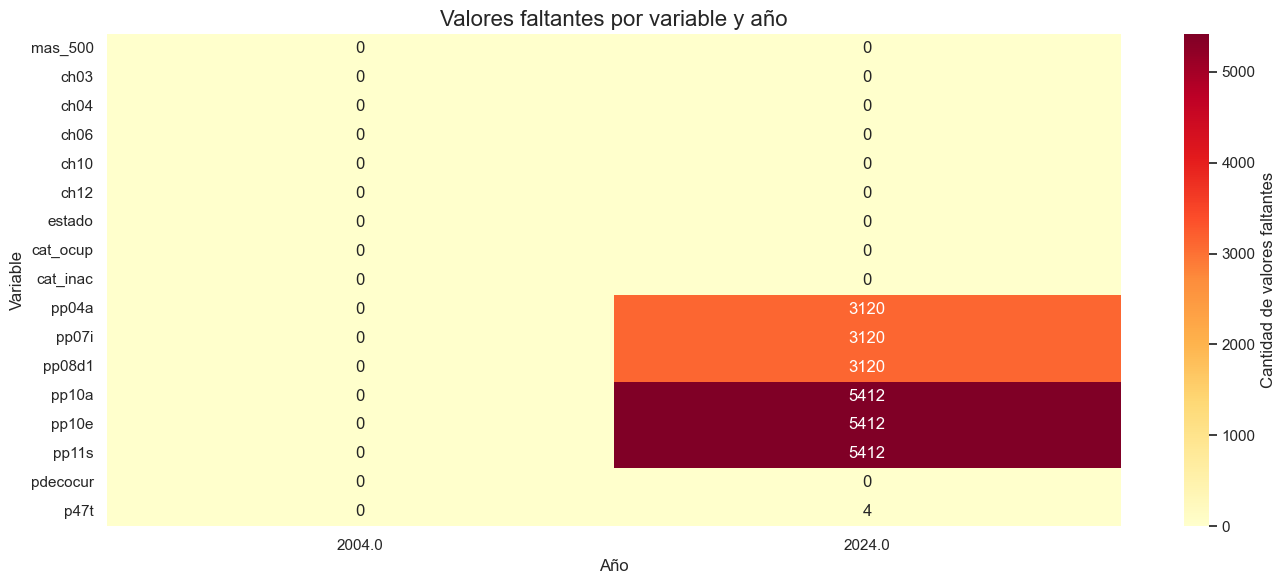

In [36]:
#Verificamos el formato de las variables
print(df_combinado.dtypes)

#Contamos los valores faltantes por año
valores_faltantes = df_combinado.groupby('ano4').agg(lambda x: x.isna().sum())

#Convertimos a DataFrame para mejor visualización
valores_faltantes_df = valores_faltantes.reset_index()
valores_faltantes_df.columns = ['Año'] + list(valores_faltantes_df.columns[1:])

#Mostramos la tabla
print("Valores faltantes por variable y año:")
print(valores_faltantes_df)

#Identificamos la variable con más valores faltantes y el año correspondiente
max_faltantes = valores_faltantes_df.iloc[:, 1:].max()
variable_mas_faltantes = max_faltantes.idxmax()

# Buscamos el año donde esa variable tiene más faltantes
fila_con_mas_faltantes = valores_faltantes_df.loc[valores_faltantes_df[variable_mas_faltantes].idxmax()]
año_con_mas_faltantes = fila_con_mas_faltantes['Año']

print(f"\nLa variable con más valores faltantes es '{variable_mas_faltantes}' en el año {int(año_con_mas_faltantes)}.")

#Visualizamos con heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
heatmap_data = valores_faltantes_df.set_index('Año')
sns.heatmap(heatmap_data.T, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={'label': 'Cantidad de valores faltantes'})

plt.title('Valores faltantes por variable y año', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [38]:
# Vemos cuántos valores negativos hay
negativos = df_combinado['pp08d1'] < 0

# Verificamos si hay alguno
if negativos.any():
    cantidad = negativos.sum()
    #Reemplazamos los negativos por 0
    df_combinado.loc[negativos, 'pp08d1'] = 0
    print("Se reemplazaron {cantidad} valores negativos en 'pp08d1' por 0.")
    print("Cambios realizados: limpiamos 'pp08d1' para que no tenga ingresos negativos.")
else:
    print("No hay valores negativos en 'pp08d1'. No fue necesario hacer cambios.")

Se reemplazaron {cantidad} valores negativos en 'pp08d1' por 0.
Cambios realizados: limpiamos 'pp08d1' para que no tenga ingresos negativos.


## Parte II

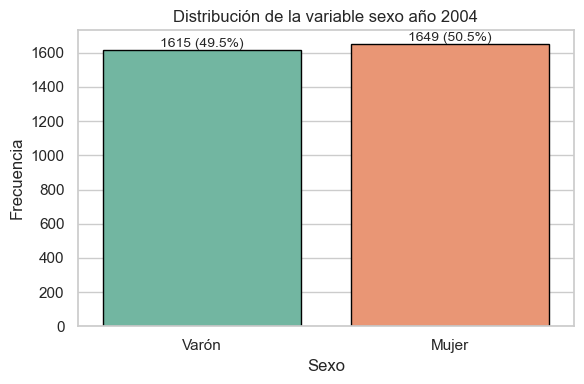

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparamos los datos
conteo = df1_final['ch04'].value_counts().sort_index()
total = conteo.sum()

# Creamos el gráfico sin warning
plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df1_final, 
    x='ch04', 
    hue='ch04',  # agregamos hue
    palette='Set2', 
    edgecolor='black', 
    order=conteo.index,
    legend=False  # desactivamos la leyenda
)

# Agregamos los textos (cantidad y %)
for i, count in enumerate(conteo):
    porcentaje = count / total * 100
    ax.text(i, count + 1, f'{count} ({porcentaje:.1f}%)', ha='center', va='bottom', fontsize=10)

# Títulos y formato
plt.title('Distribución de la variable sexo año 2004')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



In [43]:
print(df2_final['ch04'].nunique())
print(df2_final['ch04'].unique())


2
[2 1]


In [45]:
# Creamos una nueva columna descriptiva de 'ch04'
df2_final = df2_final.copy()  
df2_final['ch04_desc'] = df2_final['ch04'].map({1: 'Varón', 2: 'Mujer'})
df2_final

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,estado,cat_ocup,cat_inac,pp04a,pp07i,pp08d1,pp10a,pp10e,pp11s,pdecocur,p47t,ch04_desc
120,2024,N,1,2,37,2,7,1,3,0,2.0,0.0,400000.0,NaN,NaN,NaN,8.0,-9.0,Mujer
121,2024,N,3,1,17,1,4,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Varón
122,2024,N,3,1,12,1,2,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Varón
123,2024,N,3,1,5,1,1,4,0,5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Varón
133,2024,N,1,1,62,2,2,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200000.0,Varón
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,2024,N,1,1,35,1,7,1,3,0,2.0,0.0,900000.0,NaN,NaN,NaN,10.0,900000.0,Varón
46029,2024,N,3,2,13,1,4,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mujer
46030,2024,N,3,2,11,1,2,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mujer
46031,2024,N,1,1,29,2,6,1,3,0,2.0,0.0,350000.0,NaN,NaN,NaN,8.0,350000.0,Varón


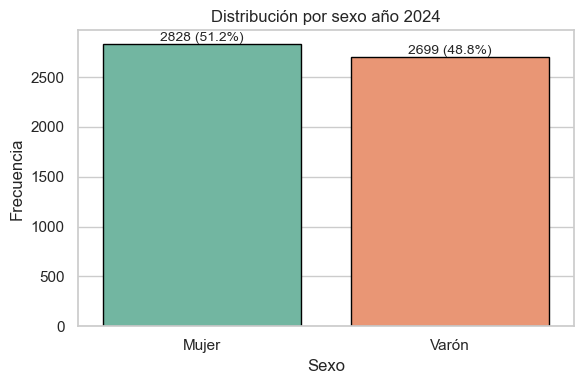

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recontamos y preparar info
conteo = df2_final['ch04_desc'].value_counts().sort_index()
total = conteo.sum()

# Plot
plt.figure(figsize=(6, 4))  # tamaño más razonable
ax = sns.countplot(
    data=df2_final,
    x='ch04_desc',  # Usar la columna con las descripciones
    hue='ch04_desc',  # Usar 'hue' como 'ch04_desc' para que se aplique el color por categoría
    palette='Set2',
    edgecolor='black',
    order=conteo.index  # Ordenar según los conteos
)

# Agregamos textos a las barras
for i, count in enumerate(conteo):
    porcentaje = count / total * 100
    ax.text(i, count + 1, f'{count} ({porcentaje:.1f}%)', ha='center', va='bottom', fontsize=10)

# Títulos y ejes
plt.title('Distribución por sexo año 2024')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.tight_layout()  # Ajustar márgenes
plt.show()


#### Lo que podemos ver es que aumenta la proporción de mujeres y disminuye la de varones en el período de 2024 respecto del 2004.

## Parte III

### EJERCICIO 5

In [136]:
DF1_filtrado = df1[df1["region"] == '44']

# Lista de columnas que queremos ver
Columnas_deseadas = [
    'ano4', 'estado', 'ch06', 'ch12',
    'cat_ocup', 'cat_inac', 'ipcf'
]

DF1_filtrado[Columnas_deseadas]


,ano4,estado,ch06,ch12,cat_ocup,cat_inac,ipcf
42025,2004.0,Ocupado,34.0,Secundario,Cuenta propia,0.0,1000.0
42026,2004.0,Ocupado,62.0,Primario,Cuenta propia,0.0,600.0
42027,2004.0,Inactivo,58.0,Primario,0.0,Ama de casa,600.0
42028,2004.0,Ocupado,38.0,Secundario,Cuenta propia,0.0,280.0
42029,2004.0,Inactivo,35.0,Secundario,0.0,Ama de casa,280.0
...,...,...,...,...,...,...,...
45284,2004.0,Ocupado,37.0,Universitario,Obrero o empleado,0.0,638.0
45285,2004.0,Ocupado,35.0,Secundario,Obrero o empleado,0.0,638.0
45286,2004.0,Inactivo,13.0,EGB,0.0,Estudiante,638.0
45287,2004.0,Menor de 10 años,5.0,Jardín/Preescolar,0.0,Menor de 6 años,638.0


In [138]:
# Contamos desocupados e inactivos
total_registros = DF1_filtrado.shape[0]  # Total de registros en el DataFrame filtrado

# Contamos desocupados (estado == 2) e inactivos (estado == 3)
desocupados = DF1_filtrado[DF1_filtrado['estado'] == 'Desocupado'].shape[0]
inactivos = DF1_filtrado[DF1_filtrado['estado'] == 'Inactivo'].shape[0]

print('Desocupados 04 =',desocupados, 'Inactivos 04 =', inactivos)


Desocupados 04 = 119 Inactivos 04 = 1307


In [140]:
# Calculamos porcentajes
porcentaje_desocupados = (desocupados / total_registros) * 100 if total_registros > 0 else 0
porcentaje_inactivos = (inactivos / total_registros) * 100 if total_registros > 0 else 0

# Resultados
print(f"Total desocupados: {desocupados} ({porcentaje_desocupados:.2f}%)")
print(f"Total inactivos: {inactivos} ({porcentaje_inactivos:.2f}%)")

Total desocupados: 119 (3.65%)
Total inactivos: 1307 (40.04%)


In [142]:
DF2_filtrado = df2[df2["REGION"] == 44]


DF2_filtrado

# Lista de columnas que queremos ver
Columnas_deseadas = [
    'ANO4', 'ESTADO', 'CH06', 'CH12',
    'CAT_OCUP', 'CAT_INAC', 'IPCF'
]

DF2_filtrado[Columnas_deseadas]

,ANO4,ESTADO,CH06,CH12,CAT_OCUP,CAT_INAC,IPCF
120,2024,1,37,7,3,0,0.00
121,2024,3,17,4,0,3,0.00
122,2024,3,12,2,0,3,0.00
123,2024,4,5,1,0,5,0.00
133,2024,3,62,2,0,1,96400.00
...,...,...,...,...,...,...,...
46028,2024,1,35,7,3,0,300000.00
46029,2024,3,13,4,0,3,300000.00
46030,2024,3,11,2,0,3,300000.00
46031,2024,1,29,6,3,0,183333.33


In [144]:
# Contamos desocupados e inactivos
total_registros24 = DF2_filtrado.shape[0]  # Total de registros en el DataFrame filtrado

# Contamos desocupados (estado == 2) e inactivos (estado == 3)
desocupados24 = DF2_filtrado[DF2_filtrado['ESTADO'] == 2].shape[0]
inactivos24 = DF2_filtrado[DF2_filtrado['ESTADO'] == 3].shape[0]

print('Desocupados 24 =',desocupados24, 'Inactivos 24 =', inactivos24)



Desocupados 24 = 115 Inactivos 24 = 2357


In [146]:
# Calculamos porcentajes
porcentaje_desocupados24 = (desocupados24 / total_registros24) * 100 if total_registros24 > 0 else 0
porcentaje_inactivos24 = (inactivos24 / total_registros24) * 100 if total_registros24 > 0 else 0

# Resultados
print(f"Total desocupados 24: {desocupados24} ({porcentaje_desocupados24:.2f}%)")
print(f"Total inactivos 24: {inactivos24} ({porcentaje_inactivos24:.2f}%)")

Total desocupados 24: 115 (2.08%)
Total inactivos 24: 2357 (42.65%)


#### Baja de 2004 al 2024 el porcentaje de desocupados en un 1,57% y el porcentaje de inactivos aumenta en un 2,61%

## EJERCICIO 6

In [150]:
# Ver los datos de la variable 'estado' en DF1_filtrado
estado_data = DF1_filtrado['estado']

# Mostrar los datos
estado_data.value_counts()

estado
Inactivo                                                        1307
Ocupado                                                         1238
Menor de 10 años                                                 600
Desocupado                                                       119
Entrevista individual no realizada (no respuesta al cuestion       0
Name: count, dtype: int64

In [152]:
# Creamos bases para DF1_filtrado
noresponden1 = DF1_filtrado[DF1_filtrado['estado'] == 'Entrevista individual no realizada (no respuesta al cuestion']
responden1 = DF1_filtrado[DF1_filtrado['estado'] != 'Entrevista individual no realizada (no respuesta al cuestion']
noresponden1

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp


In [154]:

# Creamos bases para DF2_filtrado
noresponden2 = DF2_filtrado[DF2_filtrado['ESTADO'] == 0]
responden2 = DF2_filtrado[DF2_filtrado['ESTADO'] != 0]

# Mostramos las formas de los nuevos DataFrames
print(f"noresponden1: {noresponden1.shape}")
print(f"responden1: {responden1.shape}")
print(f"noresponden2: {noresponden2.shape}")
print(f"responden2: {responden2.shape}")

noresponden1: (0, 176)
responden1: (3264, 176)
noresponden2: (4, 177)
responden2: (5523, 177)


## EJERCICIO 7

In [157]:
# Definimos la función para asignar valores a la nueva variable PEA
def asignar_pea1(estado):
    if estado == 'Ocupado':
        return 1
    elif estado == 'Desocupado':
        return 2
    else:
        return None  

# Aplicamos la función a la columna 'estado' y crear la nueva columna 'PEA'
responden1['PEA'] = responden1['estado'].apply(asignar_pea1)

# Mostramos las primeras filas del DataFrame para verificar
responden1[['estado', 'PEA']]


,estado,PEA
42025,Ocupado,1.0
42026,Ocupado,1.0
42027,Inactivo,NaN
42028,Ocupado,1.0
42029,Inactivo,NaN
...,...,...
45284,Ocupado,1.0
45285,Ocupado,1.0
45286,Inactivo,NaN
45287,Menor de 10 años,NaN


In [159]:
# Contamos la cantidad de cada categoría en la columna PEA
conteo_pea = responden1['PEA'].value_counts()

# Calculamos el porcentaje de cada categoría
porcentaje_pea = (conteo_pea / conteo_pea.sum()) * 100

# Mostramos los resultados
resultado1 = pd.DataFrame({
    'Cantidad': conteo_pea,
    'Porcentaje': porcentaje_pea
})

resultado1

,Cantidad,Porcentaje
PEA,,
1.0,1238,91.230656
2.0,119,8.769344


In [161]:
responden2 = responden2.copy()

# Definimos la función para asignar valores a la nueva variable PEA
def asignar_pea2(ESTADO):
    if ESTADO == 1:
        return 1
    elif ESTADO == 2:
        return 2
    else:
        return None  

# Aplicamos la función a la columna 'ESTADO' y crear la nueva columna 'PEA' usando .loc
responden2.loc[:, 'PEA'] = responden2['ESTADO'].apply(asignar_pea2)

# Mostramos las primeras filas del DataFrame para verificar
print(responden2[['ESTADO', 'PEA']].head())

     ESTADO  PEA
120       1  1.0
121       3  NaN
122       3  NaN
123       4  NaN
133       3  NaN


In [163]:
# Contamos la cantidad de cada categoría en la columna PEA
conteo_pea = responden2['PEA'].value_counts()

# Calculamos el porcentaje de cada categoría
porcentaje_pea = (conteo_pea / conteo_pea.sum()) * 100

# Mostramos los resultados
resultado2 = pd.DataFrame({
    'Cantidad': conteo_pea,
    'Porcentaje': porcentaje_pea
})

resultado2

,Cantidad,Porcentaje
PEA,,
1.0,2407,95.440127
2.0,115,4.559873


#### Del 2004 al 2024 observamos que aumenta la proporción de ocupados en un 4,209471

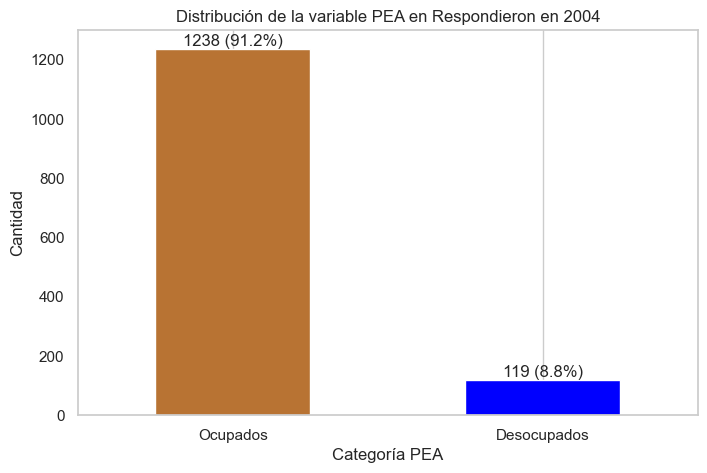

In [166]:
# Contamos la cantidad de cada categoría en la columna PEA para respondieron2
conteo_pea2 = responden1['PEA'].value_counts()

# Cambiamos los índices para que sean más descriptivos
conteo_pea2.index = ['Desocupados' if x == 2 else 'Ocupados' for x in conteo_pea2.index]

# Definimos colores para cada categoría
colores = ['#B87333' if label == 'Ocupados' else 'blue' for label in conteo_pea2.index]

# Graficamos
plt.figure(figsize=(8, 5))
ax = conteo_pea2.plot(kind='bar', color=colores)

# Añadimos título y etiquetas
plt.title('Distribución de la variable PEA en Respondieron en 2004')
plt.xlabel('Categoría PEA')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# Añadir conteo y porcentaje sobre las barras
for i in range(len(conteo_pea2)):
    conteo = conteo_pea2.iloc[i]  # Usar .iloc para acceder por posición
    porcentaje = (conteo / conteo_pea2.sum()) * 100
    ax.text(i, conteo + 0.5, f'{conteo} ({porcentaje:.1f}%)', ha='center', va='bottom')

# Mostramos el gráfico
plt.grid(axis='y')
plt.show()

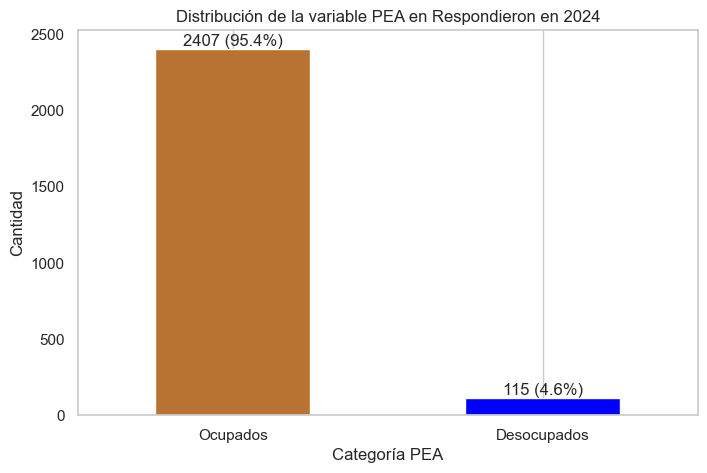

In [168]:
# Contamos la cantidad de cada categoría en la columna PEA para respondieron2
conteo_pea2 = responden2['PEA'].value_counts()

# Cambiamos los índices para que sean más descriptivos
conteo_pea2.index = ['Desocupados' if x == 2 else 'Ocupados' for x in conteo_pea2.index]

# Definimos colores para cada categoría
colores = ['#B87333' if label == 'Ocupados' else 'blue' for label in conteo_pea2.index]

# Graficamos
plt.figure(figsize=(8, 5))
ax = conteo_pea2.plot(kind='bar', color=colores)

# Añadimos título y etiquetas
plt.title('Distribución de la variable PEA en Respondieron en 2024')
plt.xlabel('Categoría PEA')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# Añadir conteo y porcentaje sobre las barras
for i in range(len(conteo_pea2)):
    conteo = conteo_pea2.iloc[i]  # Usar .iloc para acceder por posición
    porcentaje = (conteo / conteo_pea2.sum()) * 100
    ax.text(i, conteo + 0.5, f'{conteo} ({porcentaje:.1f}%)', ha='center', va='bottom')

# Mostramos el gráfico
plt.grid(axis='y')
plt.show()

## EJERCICIO 8

In [171]:
# Convertimos 'ch06' a numérico, forzando errores a NaN
responden1['ch06'] = pd.to_numeric(responden1['ch06'], errors='coerce')

# Definimos la función para asignar valores a la nueva variable PET
def asignar_pet1(ch06):
    if pd.isna(ch06):  # Verificamos si el valor es NaN
        return None
    elif 15.0 <= ch06 <= 65.9:
        return 1
    else:
        return 2

# Aplicamos la función a la columna 'ch06' y crear la nueva columna 'PET'
responden1['PET'] = responden1['ch06'].apply(asignar_pet1)

# Mostramos las primeras filas del DataFrame para verificar
print(responden1[['ch06', 'PEA', 'PET']])

       ch06  PEA  PET
42025  34.0  1.0  1.0
42026  62.0  1.0  1.0
42027  58.0  NaN  1.0
42028  38.0  1.0  1.0
42029  35.0  NaN  1.0
...     ...  ...  ...
45284  37.0  1.0  1.0
45285  35.0  1.0  1.0
45286  13.0  NaN  2.0
45287   5.0  NaN  2.0
45288   4.0  NaN  2.0

[3264 rows x 3 columns]


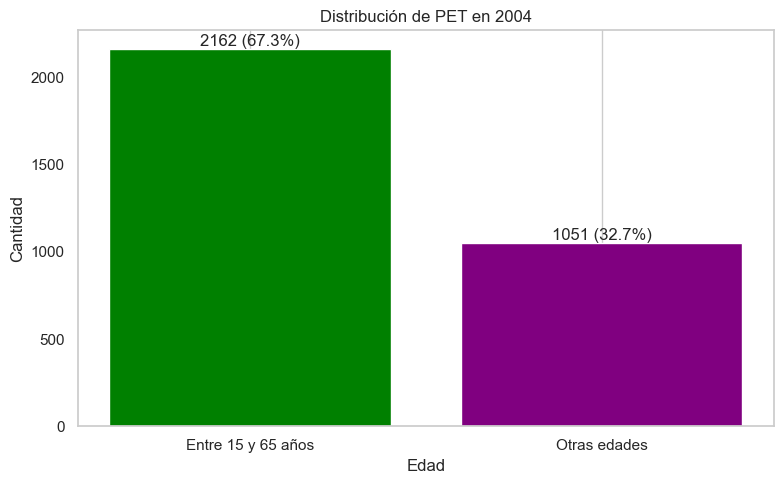

In [306]:
# Contamos las ocurrencias de cada categoría en 'PET'
conteo_pet = responden1['PET'].value_counts()

# Calculamos los porcentajes
porcentaje_pet = (conteo_pet / conteo_pet.sum()) * 100

# Creamos un DataFrame para facilitar la visualización
datos_pet = pd.DataFrame({
    'Cantidad': conteo_pet,
    'Porcentaje': porcentaje_pet
})

# Renombramos las categorías
datos_pet.index = ['Entre 15 y 65 años', 'Otras edades']

# Creamos el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(datos_pet.index, datos_pet['Cantidad'], color=['green', 'purple'])

# Añadimos etiquetas de cantidad y porcentaje en las barras
for bar, cantidad, porcentaje in zip(bars, datos_pet['Cantidad'], datos_pet['Porcentaje']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{cantidad} ({porcentaje:.1f}%)', 
             ha='center', va='bottom')

# Configuramos el gráfico
plt.title('Distribución de PET en 2004')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.grid(axis='y')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

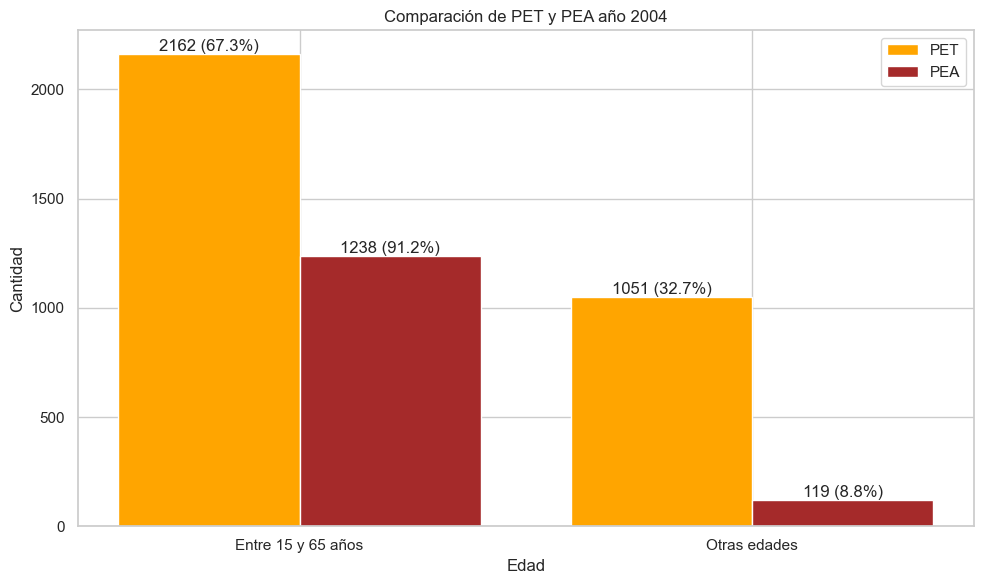

In [308]:
# Contamos las ocurrencias de cada categoría en 'PET' y 'PEA'
conteo_pet = responden1['PET'].value_counts().sort_index()
conteo_pea = responden1['PEA'].value_counts().sort_index()

# Creamos un DataFrame para facilitar la visualización
datos = pd.DataFrame({
    'PET': conteo_pet,
    'PEA': conteo_pea
}).fillna(0)  # Rellenamos NaN con 0

# Calculamos los porcentajes
porcentaje_pet = (datos['PET'] / datos['PET'].sum()) * 100
porcentaje_pea = (datos['PEA'] / datos['PEA'].sum()) * 100

# Definimos los índices para las barras
categorias = datos.index
x = range(len(categorias))

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Creamos las barras adyacentes
bar_width = 0.4
plt.bar(x, datos['PET'], width=bar_width, label='PET', color='orange', align='center')
plt.bar([p + bar_width for p in x], datos['PEA'], width=bar_width, label='PEA', color='brown', align='center')

# Añadimos etiquetas de cantidad y porcentaje en las barras
for i, (cantidad_pet, cantidad_pea, porcentaje_pet_val, porcentaje_pea_val) in enumerate(zip(datos['PET'], datos['PEA'], porcentaje_pet, porcentaje_pea)):
    plt.text(i, cantidad_pet, f'{cantidad_pet} ({porcentaje_pet_val:.1f}%)', ha='center', va='bottom')
    plt.text(i + bar_width, cantidad_pea, f'{cantidad_pea} ({porcentaje_pea_val:.1f}%)', ha='center', va='bottom')

# Añadimos etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Comparación de PET y PEA año 2004')
plt.xticks([p + bar_width / 2 for p in x], ['Entre 15 y 65 años', 'Otras edades'])  
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()

### Podemos ver que de los 2162 encuestados en edad de trabajar, solo 1238 son los economicamente activos, esto es que perciben o aspiran a percibir un sueldo. De los 1051 que estan fuera de la edad de trabajar, son 119 los que perciben o aspiran a percibir un sueldo. 

In [178]:
# Convertimos 'ch06' a numérico, forzando errores a NaN
responden2['CH06'] = pd.to_numeric(responden2['CH06'], errors='coerce')

# Definimos la función para asignar valores a la nueva variable PET
def asignar_pet2(CH06):
    if pd.isna(CH06):  # Verificamos si el valor es NaN
        return None
    elif 15.0 <= CH06 <= 65.9:
        return 1
    else:
        return 2

# Aplicamos la función a la columna 'CH06' y crear la nueva columna 'PET'
responden2['PET'] = responden2['CH06'].apply(asignar_pet2)

# Mostramos las primeras filas del DataFrame para verificar
print(responden2[['CH06', 'PEA', 'PET']])

       CH06  PEA  PET
120      37  1.0    1
121      17  NaN    1
122      12  NaN    2
123       5  NaN    2
133      62  NaN    1
...     ...  ...  ...
46028    35  1.0    1
46029    13  NaN    2
46030    11  NaN    2
46031    29  1.0    1
46032    32  1.0    1

[5523 rows x 3 columns]


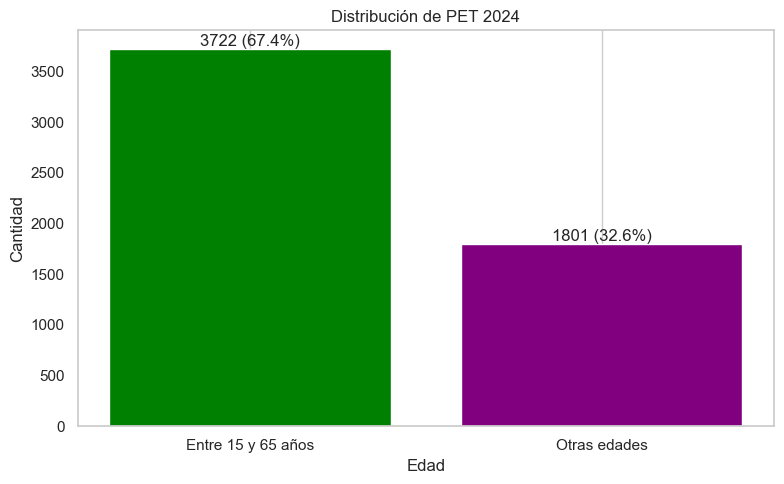

In [310]:
# Contamos las ocurrencias de cada categoría en 'PET'
conteo_pet = responden2['PET'].value_counts()

# Calculamos los porcentajes
porcentaje_pet = (conteo_pet / conteo_pet.sum()) * 100

# Creamos un DataFrame para facilitar la visualización
datos_pet = pd.DataFrame({
    'Cantidad': conteo_pet,
    'Porcentaje': porcentaje_pet
})

# Renombramos las categorías
datos_pet.index = ['Entre 15 y 65 años', 'Otras edades']

# Creamos el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(datos_pet.index, datos_pet['Cantidad'], color=['green', 'purple'])

# Añadimos etiquetas de cantidad y porcentaje en las barras
for bar, cantidad, porcentaje in zip(bars, datos_pet['Cantidad'], datos_pet['Porcentaje']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{cantidad} ({porcentaje:.1f}%)', 
             ha='center', va='bottom')

# Configuramos el gráfico
plt.title('Distribución de PET 2024')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.grid(axis='y')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

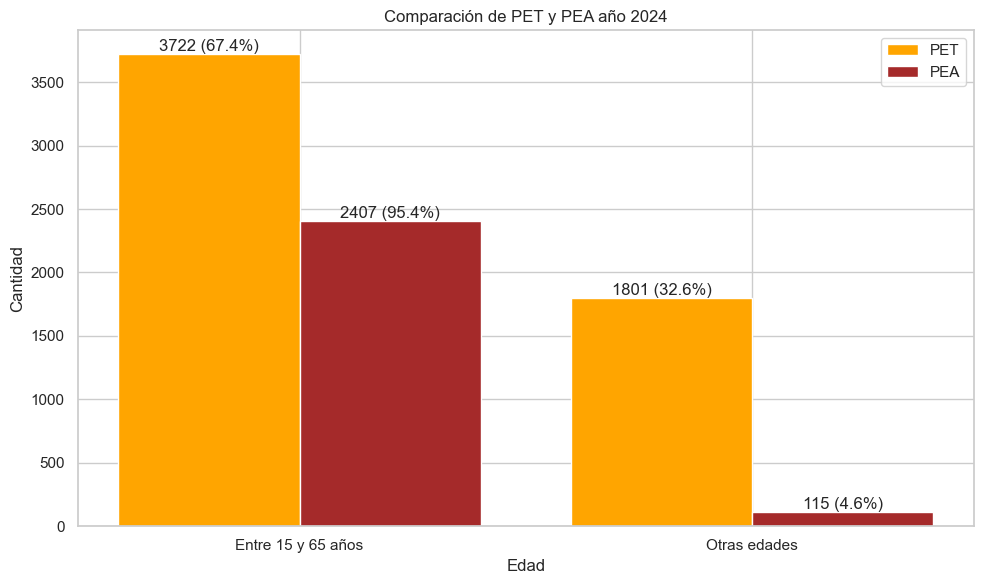

In [313]:
# Contamos las ocurrencias de cada categoría en 'PET' y 'PEA'
conteo_pet = responden2['PET'].value_counts().sort_index()
conteo_pea = responden2['PEA'].value_counts().sort_index()

# Creamos un DataFrame para facilitar la visualización
datos = pd.DataFrame({
    'PET': conteo_pet,
    'PEA': conteo_pea
}).fillna(0)  # Rellenamos NaN con 0

# Calculamos los porcentajes
porcentaje_pet = (datos['PET'] / datos['PET'].sum()) * 100
porcentaje_pea = (datos['PEA'] / datos['PEA'].sum()) * 100

# Definimos los índices para las barras
categorias = datos.index
x = range(len(categorias))

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Creamos las barras adyacentes
bar_width = 0.4
plt.bar(x, datos['PET'], width=bar_width, label='PET', color='orange', align='center')
plt.bar([p + bar_width for p in x], datos['PEA'], width=bar_width, label='PEA', color='brown', align='center')

# Añadimos etiquetas de cantidad y porcentaje en las barras
for i, (cantidad_pet, cantidad_pea, porcentaje_pet_val, porcentaje_pea_val) in enumerate(zip(datos['PET'], datos['PEA'], porcentaje_pet, porcentaje_pea)):
    plt.text(i, cantidad_pet, f'{cantidad_pet} ({porcentaje_pet_val:.1f}%)', ha='center', va='bottom')
    plt.text(i + bar_width, cantidad_pea, f'{cantidad_pea} ({porcentaje_pea_val:.1f}%)', ha='center', va='bottom')

# Añadimos etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Comparación de PET y PEA año 2024')
plt.xticks([p + bar_width / 2 for p in x], ['Entre 15 y 65 años', 'Otras edades'])  
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()

### Podemos ver que de los 3722 encuestados en edad de trabajar, solo 2407 son los economicamente activos, esto es que perciben o aspiran a percibir un sueldo. De los 1801 que estan fuera de la edad de trabajar, son 115 los que perciben o aspiran a percibir un sueldo. 

## **EJERCICIO 9**

In [190]:
# Agregar la nueva columna 'desocupados'
responden1['desocupados'] = responden1['estado'].apply(lambda x: 1 if x == 'Desocupados' else 2)
responden1.desocupados

42025    2
42026    2
42027    2
42028    2
42029    2
        ..
45284    2
45285    2
45286    2
45287    2
45288    2
Name: desocupados, Length: 3264, dtype: int64

In [202]:
# Conteo
conteo_desocupados = responden1['desocupados'].value_counts()
print('Cantidad de Desocupados 2004')
for estado, cantidad in conteo_desocupados.items():
    print(f'Cantidad de {"Desocupados" if estado == 1 else "No Desocupados"}: {cantidad}')

Cantidad de Desocupados 2004
Cantidad de No Desocupados: 3145
Cantidad de Desocupados: 119


In [194]:
# Agregar la nueva columna 'desocupados'
responden2['DESOCUPADOS'] = responden2['ESTADO'].apply(lambda x: 1 if x == 2 else 2)
responden2.DESOCUPADOS

120      2
121      2
122      2
123      2
133      2
        ..
46028    2
46029    2
46030    2
46031    2
46032    2
Name: DESOCUPADOS, Length: 5523, dtype: int64

In [206]:
# Conteo
conteo_desocupados = responden2['DESOCUPADOS'].value_counts()
print('Cantidad de Desocupados 2024')
for estado, cantidad in conteo_desocupados.items():
    print(f'Cantidad de {"Desocupados" if estado == 1 else "No Desocupados"}: {cantidad}')

Cantidad de Desocupados 2024
Cantidad de No Desocupados: 5408
Cantidad de Desocupados: 115


## En 2004 los desocupados en la encuesta eran 119 que para 2024 pasan a ser 115.

#### Ítem a

In [261]:
# Contamos desocupados y no desocupados por nivel educativo en la base 'responden1'
conteo_desocupados = responden1.groupby('ch12')['desocupados'].value_counts(normalize=False).unstack(fill_value=0)

# Renombramos las columnas para mayor claridad
conteo_desocupados.columns = ['Desocupados', 'NoDesocupados']

# Calculamos totales y porcentajes
conteo_desocupados['Total'] = conteo_desocupados['Desocupados'] + conteo_desocupados['NoDesocupados']
conteo_desocupados['% Desocupados'] = (conteo_desocupados['Desocupados'] / conteo_desocupados['Total']) * 100
conteo_desocupados['% No Desocupados'] = (conteo_desocupados['NoDesocupados'] / conteo_desocupados['Total']) * 100

# Mostramos el resultado
print(conteo_desocupados)

                                    Desocupados  NoDesocupados  Total  \
ch12                                                                    
0.0                                           0            250    250   
Jardín/Preescolar                             0             78     78   
Primario                                     31            757    788   
EGB                                           3            487    490   
Secundario                                   60            916    976   
Polimodal                                     9            151    160   
Terciario                                    11            194    205   
Universitario                                 5            301    306   
Posgrado Universitario                        0              3      3   
Educación especial (discapacitado)            0              8      8   
Ns./Nr.                                       0              0      0   

                                    % Desocupados 

C:\Users\gabar\AppData\Local\Temp\ipykernel_15916\3990831547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_desocupados = responden1.groupby('ch12')['desocupados'].value_counts(normalize=False).unstack(fill_value=0)


#### no logré sacar el warning

In [247]:

# Diccionario para mapear los niveles educativos
niveles_educativos = {
    1: "Jardín/preescolar",
    2: "Primario",
    3: "EGB",
    4: "Secundario",
    5: "Polimodal",
    6: "Terciario",
    7: "Universitario",
    8: "Posgrado universitario",
    9: "Educación especial (discapacitado)"
}

# Contamos desocupados y no desocupados por nivel educativo en la base 'responden2'
conteo_desocupados = responden2.groupby('CH12')['DESOCUPADOS'].value_counts(normalize=False).unstack(fill_value=0)

# Renombramos las columnas para mayor claridad
conteo_desocupados.columns = ['Desocupados', 'NoDesocupados']

# Reemplazamos los números en el índice por las descripciones
conteo_desocupados.index = conteo_desocupados.index.map(niveles_educativos)

# Calculamos totales y porcentajes
conteo_desocupados['Total'] = conteo_desocupados['Desocupados'] + conteo_desocupados['NoDesocupados']
conteo_desocupados['% Desocupados'] = (conteo_desocupados['Desocupados'] / conteo_desocupados['Total']) * 100
conteo_desocupados['% No Desocupados'] = (conteo_desocupados['NoDesocupados'] / conteo_desocupados['Total']) * 100

# Mostramos el resultado
conteo_desocupados

,Desocupados,NoDesocupados,Total,% Desocupados,% No Desocupados
CH12,,,,,
NaN,0,184,184,0.000000,100.000000
Jardín/preescolar,0,157,157,0.000000,100.000000
Primario,12,1337,1349,0.889548,99.110452
EGB,0,14,14,0.000000,100.000000
Secundario,71,2404,2475,2.868687,97.131313
Polimodal,0,13,13,0.000000,100.000000
Terciario,12,534,546,2.197802,97.802198
Universitario,20,710,730,2.739726,97.260274
Posgrado universitario,0,37,37,0.000000,100.000000


#### Ítem b

In [264]:
# Creamos la variable categórica de edad agrupada en intervalos de 10 años
bins = range(0, 101, 10)  
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Etiquetas: '0-9', '10-19', ..., '90-99'

# Asignamos la nueva variable categórica
responden1['EdadGrupo'] = pd.cut(responden1['ch06'], bins=bins, labels=labels, right=False)

# Calculamos la proporción de desocupados por grupo de edad
proporcion_desocupados = responden1.groupby('EdadGrupo')['desocupados'].value_counts(normalize=True).unstack(fill_value=0)

# Renombramos las columnas para mayor claridad
proporcion_desocupados.columns = ['No Desocupados', 'Desocupados']

# Mostramos el resultado
print(proporcion_desocupados)

           No Desocupados  Desocupados
EdadGrupo                             
0-9              0.000000     1.000000
10-19            0.026087     0.973913
20-29            0.098837     0.901163
30-39            0.036093     0.963907
40-49            0.039813     0.960187
50-59            0.038585     0.961415
60-69            0.019355     0.980645
70-79            0.014493     0.985507
80-89            0.000000     1.000000
90-99            0.000000     1.000000


C:\Users\gabar\AppData\Local\Temp\ipykernel_15916\78402845.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_desocupados = responden1.groupby('EdadGrupo')['desocupados'].value_counts(normalize=True).unstack(fill_value=0)


In [268]:
# Creamos la variable categórica de edad agrupada en intervalos de 10 años
bins = range(0, 101, 10)  
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Etiquetas: '0-9', '10-19', ..., '90-99'

# Asignamos la nueva variable categórica
responden2['EdadGrupo'] = pd.cut(responden2['CH06'], bins=bins, labels=labels, right=False)

# Calculamos la proporción de desocupados por grupo de edad
proporcion_desocupados = responden2.groupby('EdadGrupo')['DESOCUPADOS'].value_counts(normalize=True).unstack(fill_value=0)

# Renombramos las columnas para mayor claridad
proporcion_desocupados.columns = ['No Desocupados', 'Desocupados']

# Mostramos el resultado
print(proporcion_desocupados)

           No Desocupados  Desocupados
EdadGrupo                             
0-9              0.000000     1.000000
10-19            0.009132     0.990868
20-29            0.051213     0.948787
30-39            0.038415     0.961585
40-49            0.022500     0.977500
50-59            0.024433     0.975567
60-69            0.009042     0.990958
70-79            0.000000     1.000000
80-89            0.000000     1.000000
90-99            0.000000     1.000000


C:\Users\gabar\AppData\Local\Temp\ipykernel_15916\1144563495.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_desocupados = responden2.groupby('EdadGrupo')['DESOCUPADOS'].value_counts(normalize=True).unstack(fill_value=0)


#### Ítem c

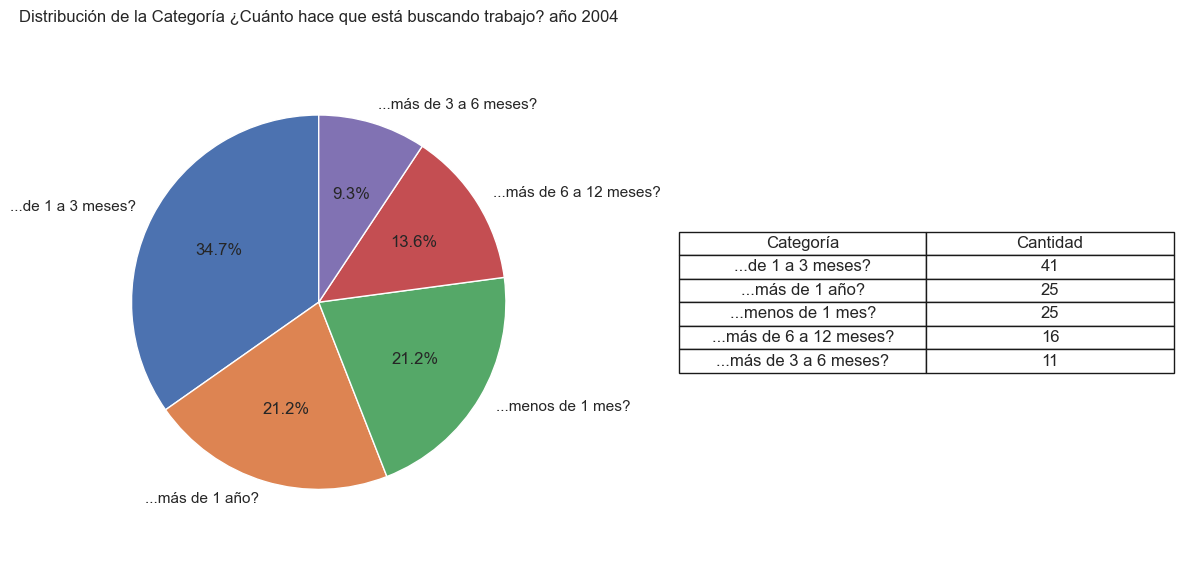

In [287]:
# Aseguramos de que 'pp10a' esté en el tipo de dato correcto (string o numérico)
DF1_filtrado.loc[:, 'pp10a'] = DF1_filtrado['pp10a'].astype(str)

# Contamos las frecuencias de cada categoría en 'pp10a', excluyendo '0.0'
frecuencias = DF1_filtrado['pp10a'].value_counts()
frecuencias = frecuencias[frecuencias.index != '0.0']  # Filtramos la categoría '0.0'

# Configuramos la figura
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Generamos el gráfico de torta
ax[0].pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Distribución de la Categoría ¿Cuánto hace que está buscando trabajo? año 2004')
ax[0].axis('equal')  # Para que el gráfico sea un círculo

# Generamos el cuadro analítico
ax[1].axis('off')  # Desactivamos los ejes
tabla = ax[1].table(cellText=frecuencias.reset_index().values, colLabels=['Categoría', 'Cantidad'], cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

# Mostramos la figura
plt.tight_layout()
plt.show()

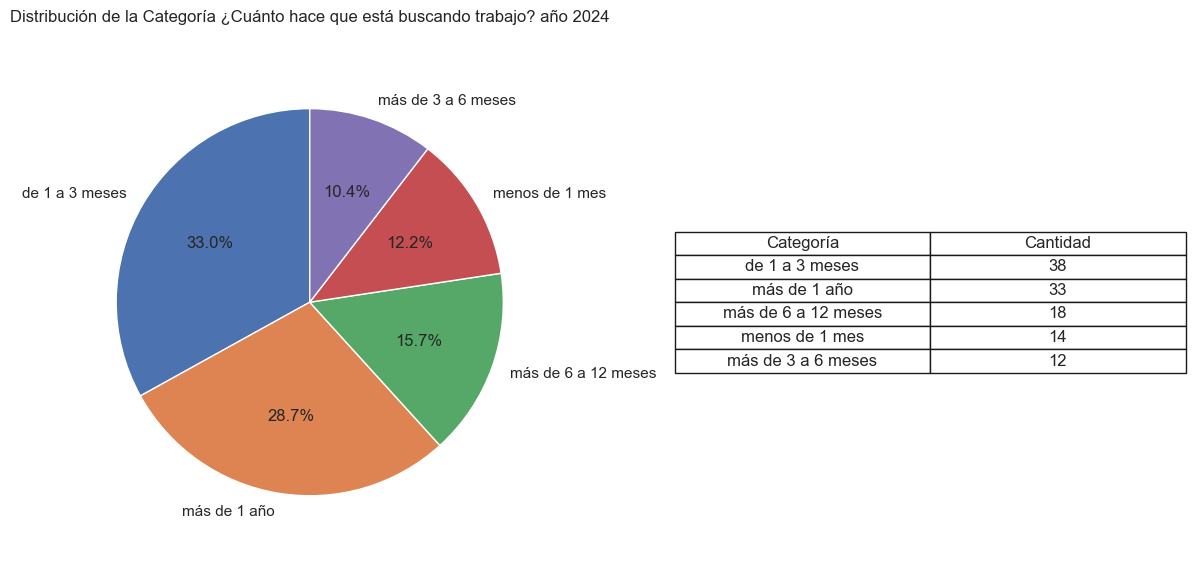

In [281]:
# Contamos las frecuencias de cada categoría en 'PP10A'
frecuencias = DF2_filtrado['PP10A'].value_counts()

# Mapeo de números a descripciones
categorias = {
    1: 'menos de 1 mes',
    2: 'de 1 a 3 meses',
    3: 'más de 3 a 6 meses',
    4: 'más de 6 a 12 meses',
    5: 'más de 1 año'
}

# Reemplazamos los números por las descripciones
frecuencias.index = [categorias[num] for num in frecuencias.index]

# Configuramos la figura
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Generamos el gráfico de torta
ax[0].pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Distribución de la Categoría ¿Cuánto hace que está buscando trabajo? año 2024')
ax[0].axis('equal')  # Para que el gráfico sea un círculo

# Generamos el cuadro analítico
ax[1].axis('off')  # Desactivamos los ejes
tabla = ax[1].table(cellText=frecuencias.reset_index().values, colLabels=['Categoría', 'Cantidad'], cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

# Mostramos la figura
plt.tight_layout()
plt.show()

#### Los desocupados que buscan trabajo desde hace menos de 1 mes en 2004 eran 21,2% del total de desocupados que en 2024 pasan a ser 12,2%, hay una reducción del 9%.
#### Los desocupados que buscan trabajo desde más de 1 a 3 meses en 2004 eran 34,7% del total de desocupados que en 2024 pasan a ser 33%, hay una disminución del 1,7%.
#### Los desocupados que buscan trabajo desde más de 3 a 6 meses en 2004 eran 9,3% del total de desocupados que en 2024 pasan a ser 10,4%, hay un aumento del 1,1%.
#### Los desocupados que buscan trabajo desde más de 6 a 12 meses en 2004 eran 13,6% del total de desocupados que en 2024 pasan a ser 15,7%, hay un crecimiento del 2,1%.
#### Los desocupados que buscan trabajo desde hace más de 1 año en 2004 eran 21,2% del total de desocupados que en 2024 pasan a ser 28,7%, hay una ampliación del 7,5%.